Linear Regression is one of the most well-known algorithms in machine learning and statistics. Here, you will be given a brief overview of how it works and how you can use it in your machine learning problems. Linear Regression was developed under the field of statistics to study the relationship between input and output numerical variables but has been borrowed by machine learning to make predictions based on a linear regression equation.

The mathematical representation of linear regression is a linear equation that combines a specific set of input data (X) to predict the output value (y) for that set of input values. The linear equation assigns a factor to each set of input values, which are called the coefficients represented by the Greek letter Beta (β). The equation mentioned below represents a linear regression model with two sets of input values,  𝑥1
and  𝑥2. Ahead, y represents the output of the model, whereas  β0 ,  β1  and  β2  are the coefficients of the linear equation.

𝑦= β0 + β1 ∗ 𝑋1 + β2 ∗ 𝑋2

In [7]:
import numpy as np
import pandas as pd
# Import matplotlib as an alias plt and set the style
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

# The data is stored in the directory 'data'
path = '../../data/ML/'

# Read the csv file using read_csv method of pandas
df = pd.read_csv(path + 'SPY.csv', index_col=0)

# Convert index to datetime format
df.index = pd.to_datetime(df.index)

# Print the first five rows 
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-12-31,2498.939941,2509.239990,2482.820068,2506.850098,3442870000
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,3733160000
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,3822860000
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,4213410000
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,4104710000


Independent variables are used to predict the value of dependent variable. For illustration purposes, we will use only one feature i.e. only one column as an independent variable. We are using the previous day's return to predict today's return.

In [8]:
# Use only one feature as a independent variable - we are using the previous day's return

df['return'] = df['Close'].pct_change()
df['prev_day_returns'] = df['return'].shift()
df.dropna(inplace=True)
    
X = df[['prev_day_returns']]

# keep time order, last 20% as test
test_frac = 0.20
split = int(len(X) * (1 - test_frac))

# Split the independent data into training/testing sets
X_train = X.iloc[:split]
X_test  = X.iloc[split:]


In [9]:
df.head()


,Open,High,Low,Close,Volume,return,prev_day_returns
Date,,,,,,,
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,3822860000,-0.024757,0.001268
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,4213410000,0.034336,-0.024757
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,4104710000,0.007010,0.034336
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,4083030000,0.009695,0.007010
2019-01-09,2580.000000,2595.320068,2568.889893,2584.959961,4052480000,0.004098,0.009695


Dependent/target variable is the outcome which the machine learning model will predict based on the independent variables. We will split the dependent variable into train and test dataset. Train sample will be used along with the independent dataset X, and the test sample will be compared with predicted values.

In [10]:
# Dependent variable 
df_y = df['return'] 

# Split the dependent data into training/testing sets
y_train = df_y.iloc[:split]
y_test  = df_y.iloc[split:]
y_test.head()

Date
2020-04-09    0.014487
2020-04-13   -0.010105
2020-04-14    0.030573
2020-04-15   -0.022030
2020-04-16    0.005817
Name: return, dtype: float64

Dependent Variable
Dependent/target variable is the outcome which the machine learning model will predict based on the independent variables. We will split the dependent variable into train and test dataset. Train sample will be used along with the independent dataset X, and the test sample will be compared with predicted values.

In [11]:
# Dependent variable 
df_y = df['return'] 

# Split the dependent data into training/testing sets
y_train = df_y.iloc[:split]
y_test  = df_y.iloc[split:]
y_test.head()

Date
2020-04-09    0.014487
2020-04-13   -0.010105
2020-04-14    0.030573
2020-04-15   -0.022030
2020-04-16    0.005817
Name: return, dtype: float64

Regression Model
We will use the linear_model function of the scikit-learn library to create a linear regression model.

In [12]:
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = regr.predict(X_test)

Mean Squared Error
Mean square error (MSE) is the average of the square of the errors. The larger the number, the larger the error.

In [14]:
# Mean squared error
mse  = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse:.6f}")

Mean squared error: 0.000237


Plot Regression Line
We will plot the regression line for our model to get a visual representation.

 R²:-0.0534


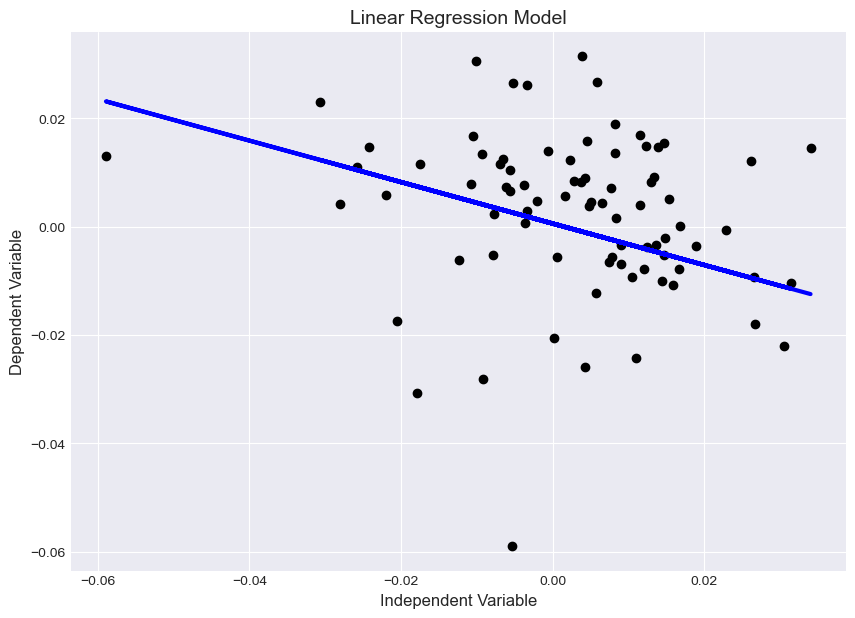

In [15]:
r2   = r2_score(y_test, y_pred)                         # same as regr.score(X_test, y_test)
print(f" R²:{r2:.4f}")

# Plot outputs
plt.figure(figsize=(10, 7))
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, regr.predict(X_test), color='blue', linewidth=3)
plt.title('Linear Regression Model', fontsize=14)
plt.xlabel('Independent Variable', fontsize=12)
plt.ylabel('Dependent Variable', fontsize=12)
plt.show()

The above figure shows the regression line that the model has predicted. And the actual data points used to predict. The model's R-square (same as regression score) is only 0.0534, which means the prediction is not too strong and the model under fits the points. An R-square of 1 represents perfect fitting.

Gold preice prediction modeling --> https://blog.quantinsti.com/gold-price-prediction-using-machine-learning-python/